# **Problem Statement**

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)
from re import sub
import re
import sys
import os

# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

from imblearn.over_sampling import SMOTE
import pickle

from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Data sourcing and sentiment analysis**

In [3]:
# Reading the input data from drive
reviews = pd.read_csv("/content/drive/My Drive/capstone_project/sample30.csv",sep=',')

In [4]:
reviews.head(10)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   
6  AV16khLE-jtxr-f38VFn              K-Y   
7  AV16khLE-jtxr-f38VFn              K-Y   
8  AV16khLE-jtxr-f38VFn              K-Y   
9  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
5                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
6                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
7                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
8                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
9                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   
5                                 K-Y   
6                                 K-Y   
7                                 K-Y   
8                                 K-Y   
9                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   
5            K-Y Love Sensuality Pleasure Gel  2016-04-20T00:00:00.000Z   
6            K-Y Love Sensuality Pleasure Gel  2016-02-08T00:00:00.000Z   
7            K-Y Love Sensuality Pleasure Gel  2016-02-21T00:00:00.000Z   
8            K-Y Love Sensuality Pleasure Gel  2016-03-28T00:00:00.000Z   
9            K-Y Love Sensuality Pleasure Gel  2016-03-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   
5               False               False               1   
6              

In [5]:
reviews.shape

(30000, 15)

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
reviews.describe()

reviews_rating
count        30000.00
mean             4.48
std              0.99
min              1.00
25%              4.00
50%              5.00
75%              5.00
max              5.00

### **Data** **Preprocessing**

In [8]:
# Total reviews recoreded
total = len(reviews['reviews_text'])
print ("Number of reviews:",total)

print ("Number of unique reviewers:",len(reviews['reviews_username'].unique()))
review_prop = float(len(reviews['reviews_username'].unique())/total)
print ("Prop of unique reviewers:",round(review_prop,3))

print ("Average rating score:",round(reviews['reviews_rating'].mean(),3))

Number of reviews: 30000
Number of unique reviewers: 24915
Prop of unique reviewers: 0.831
Average rating score: 4.483


In [9]:
# function for counting missing values
def calc_Missing_Count(df):
    return df.isnull().sum()

calc_Missing_Count(reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [10]:
# Removing the missing row of user_sentiment column
reviews = reviews[~reviews.user_sentiment.isnull()]

In [11]:
# mapping the categorical user_sentiment to numerical either 1 or 0
reviews['user_sentiment'] = reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [12]:
# getting the value count of user_sentiments column

reviews["user_sentiment"].value_counts(normalize=True)

user_sentiment
1    0.89
0    0.11
Name: proportion, dtype: float64

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29999 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  object
 1   brand                 29999 non-null  object
 2   categories            29999 non-null  object
 3   manufacturer          29858 non-null  object
 4   name                  29999 non-null  object
 5   reviews_date          29953 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27429 non-null  object
 8   reviews_rating        29999 non-null  int64 
 9   reviews_text          29999 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  169 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29999 non-null  int64 
dtypes: int64(2), object(13)
memory usage: 3.7

In [14]:
reviews.describe()

reviews_rating  user_sentiment
count        29999.00        29999.00
mean             4.48            0.89
std              0.99            0.32
min              1.00            0.00
25%              4.00            1.00
50%              5.00            1.00
75%              5.00            1.00
max              5.00            1.00

In [15]:
reviews["user_sentiment"].value_counts()

user_sentiment
1    26632
0     3367
Name: count, dtype: int64

In [16]:
reviews["reviews_rating"].value_counts()

reviews_rating
5    20830
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64

In [17]:
reviews["reviews_rating"].describe()

count    29999.00
mean         4.48
std          0.99
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

<Axes: xlabel='user_sentiment', ylabel='count'>

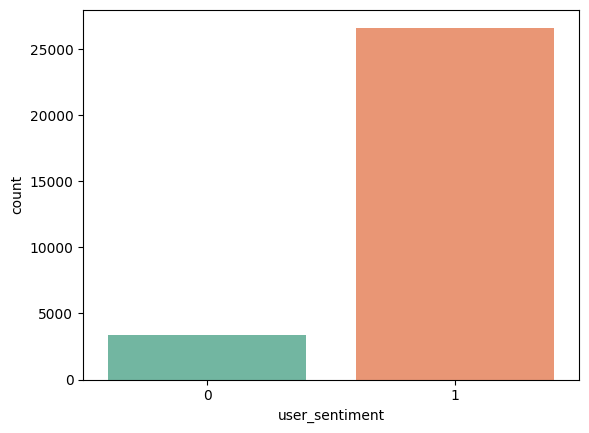

In [18]:
# Visualizing using count plot with user_sentiment column

sns.countplot(x='user_sentiment', data= reviews, palette="Set2")

<Axes: xlabel='reviews_rating', ylabel='count'>

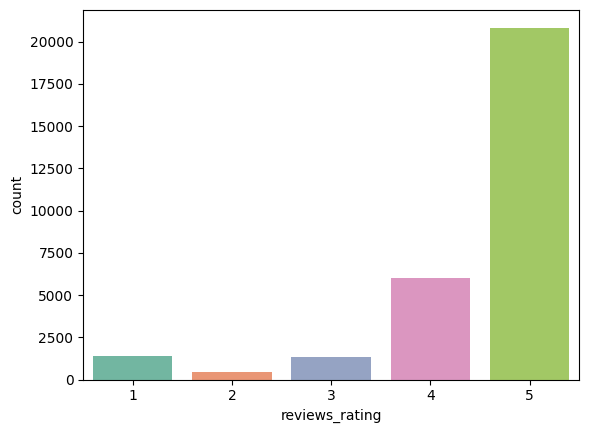

In [19]:
# visualizing the reviews_rating

sns.countplot(x='reviews_rating', data= reviews, palette="Set2")

In [20]:
reviews[reviews["user_sentiment"]==1]["reviews_rating"].describe()

count    26632.00
mean         4.56
std          0.87
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [21]:
reviews[reviews["user_sentiment"]==0]["reviews_rating"].describe()

count    3367.00
mean        3.87
std         1.54
min         1.00
25%         3.00
50%         5.00
75%         5.00
max         5.00
Name: reviews_rating, dtype: float64

In [22]:
reviews[(reviews["user_sentiment"]==1) & (reviews["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]]

reviews_title  \
9                       Don't buy   
11                 Waste of Money   
14                   Disappointed   
18                    Pretty nice   
54        New formula is terrible   
...                           ...   
29050  Didn't Do Much For Dryness   
29051                Not the best   
29053           clay conditioning   
29054                          Eh   
29055                   Just Okay   

                                                                                                                                                                                                                                                                                                      reviews_text  \
9                                                                                                                                       Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund   
11                                                                                                                                                                                    Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.   
14                                                                                                                                    First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.   
18                                                                                 I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol   
54                                          I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.   
...                                                                                                                                                                                                                                                                                                            ...   
29050  I received this product from Influenster. I absolutely love the whole system together, it made my hair oil-free for 48 hours. But I expected the conditioner to do more for the dryness at the ends of my hair like advertised. I didn't really notice much of a different in dryness before and after I...   
29051  I used this product for a month straight before reviewing it and I'm not really all that impressed. My hair still gets pretty oily, my ends are still dry.... I mean it cleaned my hair I guess. It's nothing spectacular really. It didn't make my hair extremely soft but it didn't make my hair feel ...   
29053                                                                                                                                              Got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. This review was collected as part of a promotion.   
29054  I am not in love with the conditioner. The clay mask and shampoo are GREAT but I didn't feel like this did anything for my ends. I would buy the other two, but not this, probably because I have fine hair and my ends need deep conditioning. Smells great though! I got this product free for testing...   
29055  This conditioner didn't wow me as much as the mask and shampoo of the line did. The conditioner wasn't of a very thick consistency, which I prefer for conditi

In [23]:
reviews[(reviews["user_sentiment"]==0) & (reviews["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]]

reviews_title  \
92                            hydrating but not too heavy   
96     This product has made a real difference on my skin   
100               Noticed a difference in just two weeks!   
106                                       Very rich cream   
117                                            Not greasy   
...                                                   ...   
29818                                       Great Product   
29855                                               Great   
29858    Makes my hair soft and shiny without excess oil!   
29862                                   Great Conditioner   
29941     Good for keeping combination hair under control   

                                                                                                                                                                                                                                                                                                      reviews_text  \
92                                                                                                                                                                                          It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.   
96                                                                                                                                                                                                In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.   
100                                                                                                                                               This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.   
106                                                                                                               I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.   
117                                                     I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.   
...                                                                                                                                                                                                                                                                                                            ...   
29818  I received a complimentary sample of this product and it worked so well for my hair! I have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. Will def recommend this to my family and friends! This review was collected as par...   
29855                                                                                                                                     This has prolonged the color in my hair! Not only is my hair healthier but I think I'll have to visit my stylist less! This review was collected as part of a promotion.   
29858  This conditioner makes my hair very soft without weighing it down! I was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! My hair is colored, and it hasn't faded out the color either! I'd highly recommend giving this a try! This review was collected as part of a ...   
29862                                                                                                                                                                                                    This condi

In [24]:
pd.crosstab(reviews["user_sentiment"], reviews["reviews_rating"], margins=True)

reviews_rating     1    2     3     4      5    All
user_sentiment                                     
0                597  140   220   550   1860   3367
1                787  280  1125  5470  18970  26632
All             1384  420  1345  6020  20830  29999

In [25]:
reviews.loc[(reviews["user_sentiment"]==1) & (reviews["reviews_rating"]<4), "user_sentiment"] = 0

In [26]:
reviews.loc[(reviews["user_sentiment"]==0) & (reviews["reviews_rating"]>=4), "user_sentiment"] = 1

In [27]:
pd.crosstab(reviews["user_sentiment"], reviews["reviews_rating"], margins=True)

reviews_rating     1    2     3     4      5    All
user_sentiment                                     
0               1384  420  1345     0      0   3149
1                  0    0     0  6020  20830  26850
All             1384  420  1345  6020  20830  29999

In [28]:
reviews["user_sentiment"].value_counts()

user_sentiment
1    26850
0     3149
Name: count, dtype: int64

In [29]:
reviews["brand"].value_counts()

brand
Clorox                   10585
Warner Home Video         3325
Disney                    1199
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: count, Length: 214, dtype: int64

<Axes: xlabel='brand'>

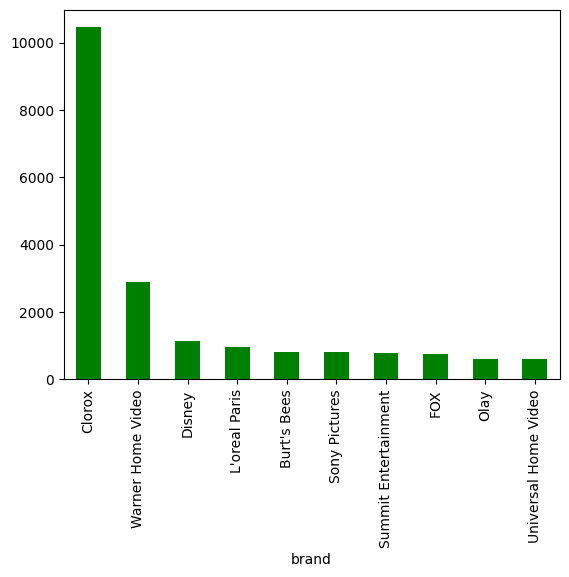

In [30]:
# Filtering the top 10 brands among the positive sentiments

reviews[reviews['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='g')

<Axes: xlabel='brand'>

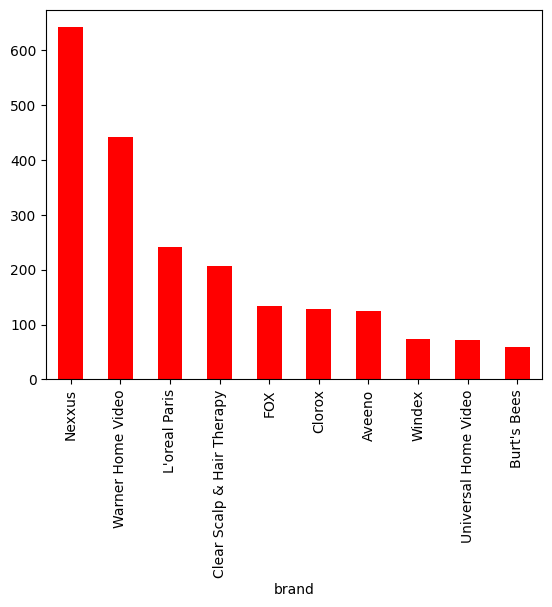

In [31]:
# Filtering top 10 brands among the negative sentiments

reviews[reviews['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [32]:
# defining filter_products

def filter_products(productId, pos=1):
    review_count = reviews[(reviews.id==productId) & (reviews.user_sentiment==pos)]['brand'].count()
    return review_count

In [33]:
# grouping the dataframe by product id and view the # of pos reviews / neg reviews count

cus =  reviews.groupby('id', as_index=False)['user_sentiment'].count()
cus["pos_review_count"] =  cus.id.apply(lambda id: filter_products(id, 1))
cus["neg_review_count"] =  cus.id.apply(lambda id: filter_products(id, 0))

In [34]:
cus.head(10)

id  user_sentiment  pos_review_count  neg_review_count
0  AV13O1A8GV-KLJ3akUyj               1                 1                 0
1  AV14LG0R-jtxr-f38QfS               2                 2                 0
2  AV16khLE-jtxr-f38VFn              27                10                17
3  AV1YGDqsGV-KLJ3adc-O             348               274                74
4  AV1YIch7GV-KLJ3addeG               1                 1                 0
5  AV1YlENIglJLPUi8IHsX              17                14                 3
6  AV1YmBrdGV-KLJ3adewb              18                17                 1
7  AV1YmDL9vKc47QAVgr7_              89                74                15
8  AV1Ymf_rglJLPUi8II2v              34                34                 0
9  AV1Yn94nvKc47QAVgtst              25                24                 1

In [35]:
# sorting the products by sentiment % i.e., postive reviews / total number of reviews

cus['sentiment %'] = np.round((cus['pos_review_count']/cus['user_sentiment'])*100,2)
cus.sort_values(by='sentiment %', ascending=False)[:20]

id  user_sentiment  pos_review_count  neg_review_count  \
0    AV13O1A8GV-KLJ3akUyj               1                 1                 0   
82   AVpf-lMV1cnluZ0-ub0_               4                 4                 0   
138  AVpfE5UF1cnluZ0-dY1N               2                 2                 0   
141  AVpfEqFbilAPnD_xUV28               4                 4                 0   
143  AVpfErGsLJeJML431yRX               1                 1                 0   
145  AVpfFGqP1cnluZ0-ddjG               1                 1                 0   
149  AVpfGRUHilAPnD_xU5nU               5                 5                 0   
150  AVpfGTRQLJeJML432WYA               8                 8                 0   
151  AVpfG_ujilAPnD_xVI8L               8                 8                 0   
153  AVpfH2Rx1cnluZ0-eYtu               3                 3                 0   
157  AVpfIGFeLJeJML4328YR               5                 5                 0   
158  AVpfIN84LJeJML432_D9               1                 1                 0   
159  AVpfIOoV1cnluZ0-ehGp               5                 5                 0   
161  AVpfIvbgLJeJML433Kph              23                23                 0   
166  AVpfKa3uilAPnD_xWSGx               1                 1                 0   
168  AVpfKhuv1cnluZ0-fSVr               1                 1                 0   
169  AVpfL-z9ilAPnD_xWzE_               2                 2                 0   
137  AVpfDiTDLJeJML431Y21               4                 4                 0   
1    AV14LG0R-jtxr-f38QfS               2                 2                 0   
134  AVpfD_NRilAPnD_xUG56               2                 2                 0   

     sentiment %  
0          100.0  
82         100.0  
138        100.0  
141        100.0  
143        100.0  
145        100.0  
149        100.0  
150        100.0  
151        100.0  
153        100.0  
157        100.0  
158        100.0  
159        100.0  
161        100.0  
166        100.0  
168        100.0  
169        100.0  
137        100.0  
1          100.0  
134        100.0

In [36]:
reviews["manufacturer"].value_counts()

manufacturer
Clorox                                8546
Test                                  3325
AmazonUs/CLOO7                        2039
L'oreal Paris                         1232
Walt Disney                           1142
                                      ... 
Pacific Foods of Oregon, Inc.            1
Unfi                                     1
Herr's                                   1
Southern Enterprises                     1
Universal Music Group / Cash Money       1
Name: count, Length: 227, dtype: int64

In [37]:
# finding the most common users.

reviews["reviews_username"].value_counts()[:10]

reviews_username
mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: count, dtype: int64

<Axes: xlabel='reviews_username'>

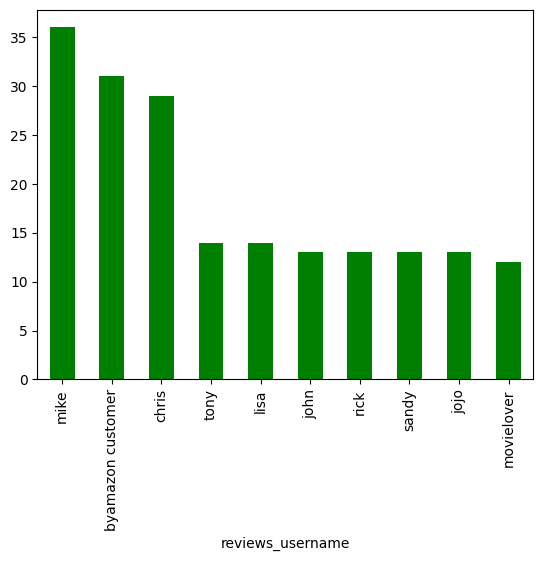

In [38]:
# ploting the customers by 'positive user sentiment'

reviews[reviews['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='g')

<Axes: xlabel='reviews_username'>

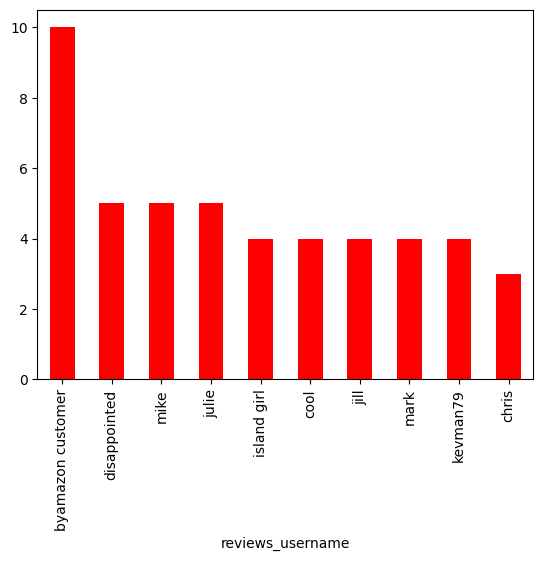

In [39]:
# ploting the customers by 'negative user sentiment'

reviews[reviews['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='r')

In [40]:
# reviews_userCity and reviews_userProvince has the most missing values so let's drop it

reviews=reviews.drop(['reviews_userCity','reviews_userProvince'],axis=1)

In [41]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29999 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29858 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29953 non-null  object
 6   reviews_didPurchase  15932 non-null  object
 7   reviews_doRecommend  27429 non-null  object
 8   reviews_rating       29999 non-null  int64 
 9   reviews_text         29999 non-null  object
 10  reviews_title        29809 non-null  object
 11  reviews_username     29936 non-null  object
 12  user_sentiment       29999 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 3.2+ MB


In [42]:
# removing NAN/NULL from username

reviews = reviews[~reviews.reviews_username.isnull()]

In [43]:
# Let's combine the reviews_text and reviews_title for better analysis

reviews["reviews_title"] = reviews["reviews_title"].fillna('')
reviews["reviews_full_text"] = reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [44]:
# getting missing row count for each column

calc_Missing_Count(reviews)

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              40
reviews_didPurchase    14005
reviews_doRecommend     2541
reviews_rating             0
reviews_text               0
reviews_title              0
reviews_username           0
user_sentiment             0
reviews_full_text          0
dtype: int64

### **Text Preprocessing for Modelling**

In [45]:
reviews[["reviews_full_text", "user_sentiment"]].sample(10)

reviews_full_text  \
29777                                                                                              Smells amazing. I received this for free and I'm glad I did. I really moisturizes your well and smells devine. And kept my hair smelling great all week long. This review was collected as part of a promotion.   
20858                                                                                                                                                                                                                                           Plain. My fault I shouldn't have gotten plain. They are very plain   
5822                                                                                                                                                                                                                                       Great Movie. Loved the movie so much had to buy it. Great action/comedy   
3700                                                                                                                                                      Great Hair Gel. This is the best hair gel I have used. I especially like that it is clear and leaves no trace of color like so many other gels often do.   
18533    Great for Sensitive Skin. I have pale, sensitive skin and often makeup irritates my skin. I couldn't afford the big name mineral makeup so I decided to try Physician's Formula and I'm glad I did. It has not made my skin itch or burn. It covers surprisingly well and has no smell, which is awesome.   
895                                                                                                                              Great all around cleaner. At Maid 2 Glimmer we find that this is a great product all around the house. It even works great on painted surfaces like doors, trim and window sills.   
16429  Bring Back Cocoa!!!!. I am scrapping the very last bits out of my last tube of Cocoa and now find out I can't buy it anymore!!!! There isn't a shade even close to it, and its my next favorite after Watermelon. Please bring it back! I have ditched all lip products for just Burt's Bees..... it tak...   
18006                                                                                         Best Lip Product Ever. This product is amazing. Sinks in and hydrates your lips all day and night. I put this on before bed and when I wake up in the morning my lips still feel super soft and hydrated. I love it!   
29343  Good Product!!. I received this product for free as part of Influenster's campaign to test the Hair Expert Extraordinary Clay mask, shampoo, and conditioner. Overall, I really liked the product. The shampoo smells wonderful and leaves my hair soft and light. the conditioner is smoothing. As seen...   
201                                                                                                                                                                     product. The best moisturizer I have used. The results I have seen are just what I want. This review was collected as part of a promotion.   

       user_sentiment  
29777               1  
20858               1  
5822                1  
3700                1  
18533               1  
895                 1  
16429               1  
18006               1  
29343               1  
201                 1

In [46]:
# function to clean the text and remove all the unnecessary elements.

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)

    return text

In [47]:
clean = reviews[['id','name', 'reviews_full_text', 'user_sentiment']]

In [48]:
clean["reviews_text"] = clean.reviews_full_text.apply(lambda x: clean_text(x))

In [49]:
clean.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

                                                                                                                                                                                                                                                                                             reviews_full_text  \
0                                                                                      Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                         Good. Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                           Good. Good flavor.   
3  Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...   
4                                                                                                                                                             Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

   user_sentiment  \
0               1   
1               1   
2               1   
3               0   
4               0   

                                                                                                                                                                                                                                                                                                  reviews_text  
0                                                                                                     just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it  rating all the way her metaphors are just crazy  
1                                                                                                                                                                                                                                            good good flavor this review was collected as part of a promotion  
2                                                                                                                                                                                                                                                                                             good good flavor  
3  disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...  
4                                                                                                        

In [50]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 29936 non-null  object
 1   name               29936 non-null  object
 2   reviews_full_text  29936 non-null  object
 3   user_sentiment     29936 non-null  int64 
 4   reviews_text       29936 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [51]:
# function to map NTLK position tags

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [52]:
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [53]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(words)

In [54]:
clean["reviews_cleaned_text"] = clean.reviews_text.apply(lambda x: lemma_text(x))

In [55]:
clean.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

                                                                                                                                                                                                                                                                                             reviews_full_text  \
0                                                                                      Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                         Good. Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                           Good. Good flavor.   
3  Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...   
4                                                                                                                                                             Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

   user_sentiment  \
0               1   
1               1   
2               1   
3               0   
4               0   

                                                                                                                                                                                                                                                                                                  reviews_text  \
0                                                                                                     just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it  rating all the way her metaphors are just crazy   
1                                                                                                                                                                                                                                            good good flavor this review was collected as part of a promotion   
2                                                                                                                                                                                                                                                                                             good good flavor   
3  disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...   
4                                                                                                   

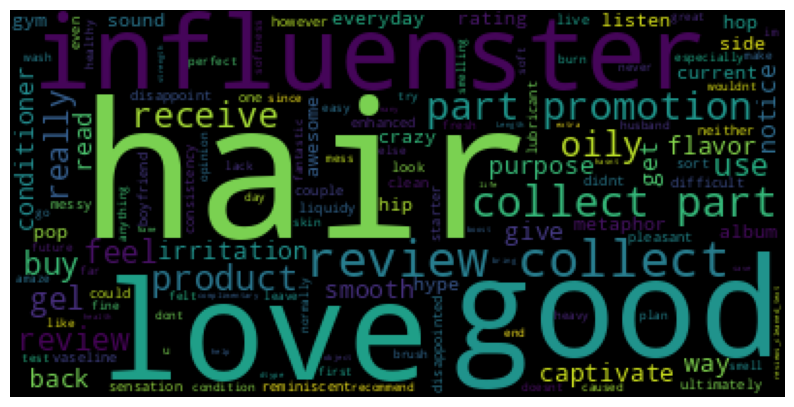

In [56]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(clean.reviews_cleaned_text))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

(array([1.0622e+04, 1.2187e+04, 3.9170e+03, 1.5600e+03, 7.5600e+02,
        3.1200e+02, 2.3100e+02, 1.1900e+02, 6.7000e+01, 4.2000e+01,
        3.5000e+01, 3.4000e+01, 1.2000e+01, 3.0000e+00, 1.0000e+01,
        3.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([3.00000e+00, 7.68400e+01, 1.50680e+02, 2.24520e+02, 2.98360e+02,
        3.72200e+02, 4.46040e+02, 5.19880e+02, 5.93720e+02, 6.67560e+02,
        7.41400e+02, 8.15240e+02, 8.89080e+02, 9.62920e+02, 1.03676e+03,
        1.11060e+03, 1.18444e+03, 1.25828e+03, 1.33212e+03, 1.40596e+03,
        1.47980e+03, 1.553

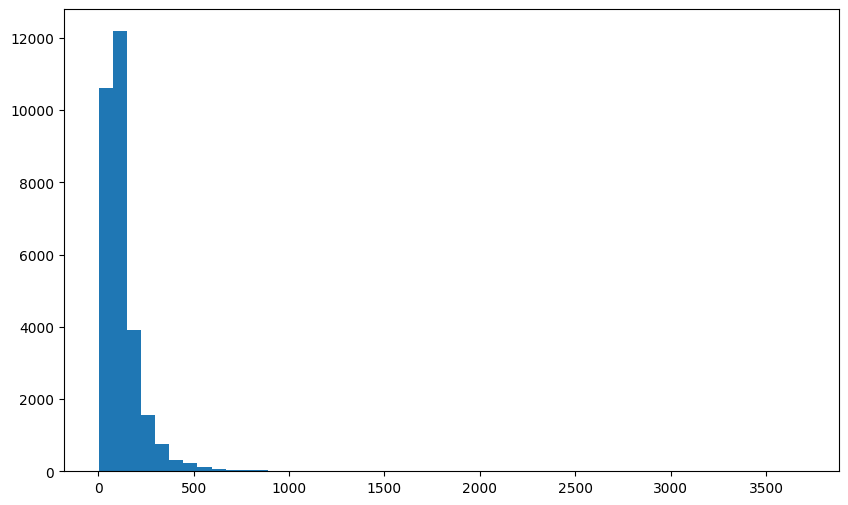

In [57]:
#visualise the data
plt.figure(figsize=(10,6))
reviews_lens = [len(d) for d in clean.reviews_cleaned_text]
plt.hist(reviews_lens, bins = 50)

In [58]:
def get_Most_Common_Words(reviews, n_most_common):
    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [59]:
pos_reviews = clean[clean['user_sentiment']==1]
get_Most_Common_Words(pos_reviews['reviews_cleaned_text'],10)

[('great', 14397),
 ('love', 12430),
 ('use', 11725),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8881),
 ('part', 8728),
 ('promotion', 8374),
 ('wipe', 8189),
 ('clean', 8077)]

(-0.5, 399.5, 199.5, -0.5)

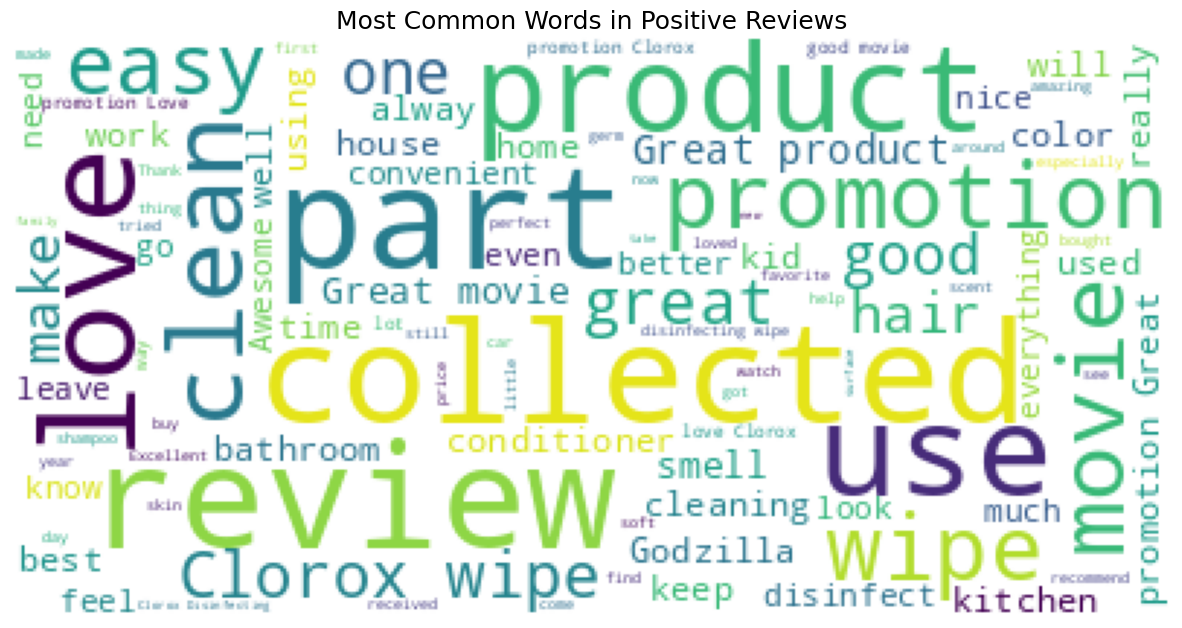

In [60]:
# Popular Wordcloud library to visualize Positive reviews

plt.figure(figsize=(15,15))
word_cloud = WordCloud(background_color="white", max_words=100, max_font_size=50)
pos_case=" ".join(clean[clean.user_sentiment==1]['reviews_full_text'].values)
word_cloud.generate(pos_case)
plt.title("Most Common Words in Positive Reviews", fontsize=18)
plt.imshow(word_cloud)
plt.axis('off')

In [61]:
neg_reviews = clean[clean['user_sentiment']==0]
get_Most_Common_Words(neg_reviews['reviews_cleaned_text'],10)

[('product', 1934),
 ('use', 1794),
 ('hair', 1575),
 ('formula', 1439),
 ('new', 1261),
 ('like', 1090),
 ('old', 1078),
 ('good', 1075),
 ('movie', 1033),
 ('gel', 876)]

(-0.5, 399.5, 199.5, -0.5)

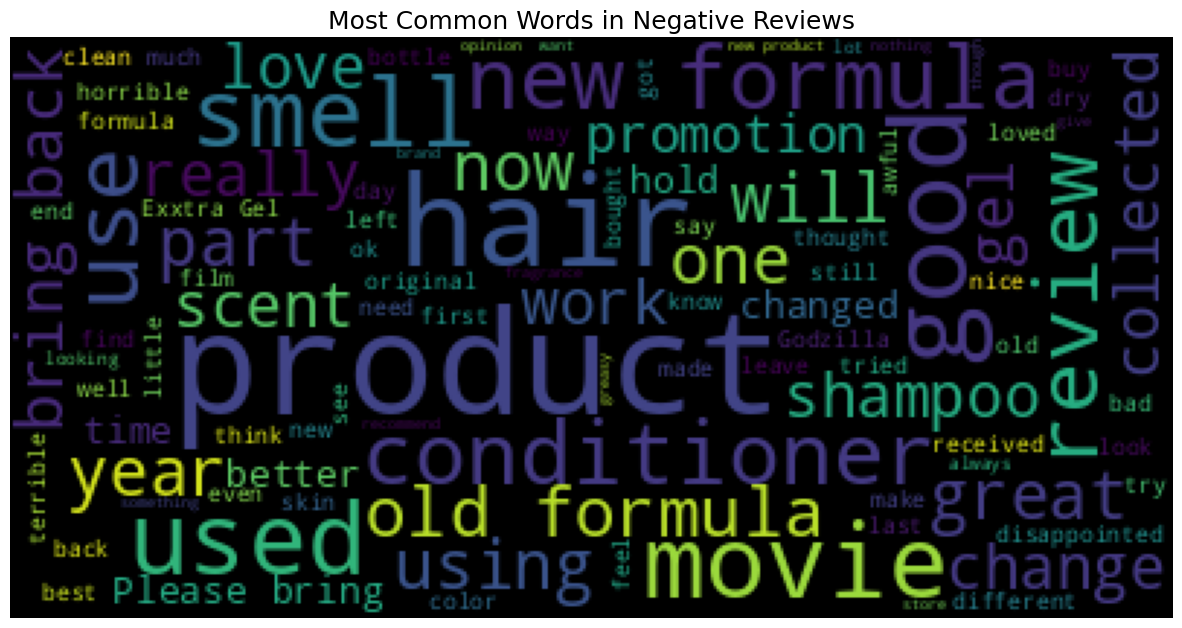

In [62]:
# Popular Wordcloud library to visualize Negative reviews

plt.figure(figsize=(15,15))
word_cloud = WordCloud(background_color="black", max_words=100, max_font_size=50)
neg_case=" ".join(clean[clean.user_sentiment==0]['reviews_full_text'].values)
word_cloud.generate(neg_case)
plt.title("Most Common Words in Negative Reviews", fontsize=18)
plt.imshow(word_cloud)
plt.axis('off')

In [63]:
#function to collect the n-gram frequency of words

def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    print("--1",sum_words)
    for word, idx in vec.vocabulary_.items():
        #print(word)
        #print(idx)
        break
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [64]:
#Print the top 10 words in the bigram frequency

common_words = get_top_n_ngram(pos_reviews['reviews_cleaned_text'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


0     1
0     review collect  7920
1  collect promotion  7920
2        clorox wipe  2803
3      great product  1944
4        great movie  1739
5           easy use  1554
6        love clorox  1223
7       love product  1137
8         use clorox  1088
9         good movie   922

In [65]:
#Print the top 10 words in the bigram frequency

common_words = get_top_n_ngram(neg_reviews['reviews_cleaned_text'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 2]]


0    1
0          new formula  520
1          old formula  515
2            bring old  369
3       review collect  346
4    collect promotion  346
5           exxtra gel  205
6          use product  183
7            make hair  157
8  shampoo conditioner  147
9             gel year  127

--1 [[1 1 1 ... 1 1 2]]


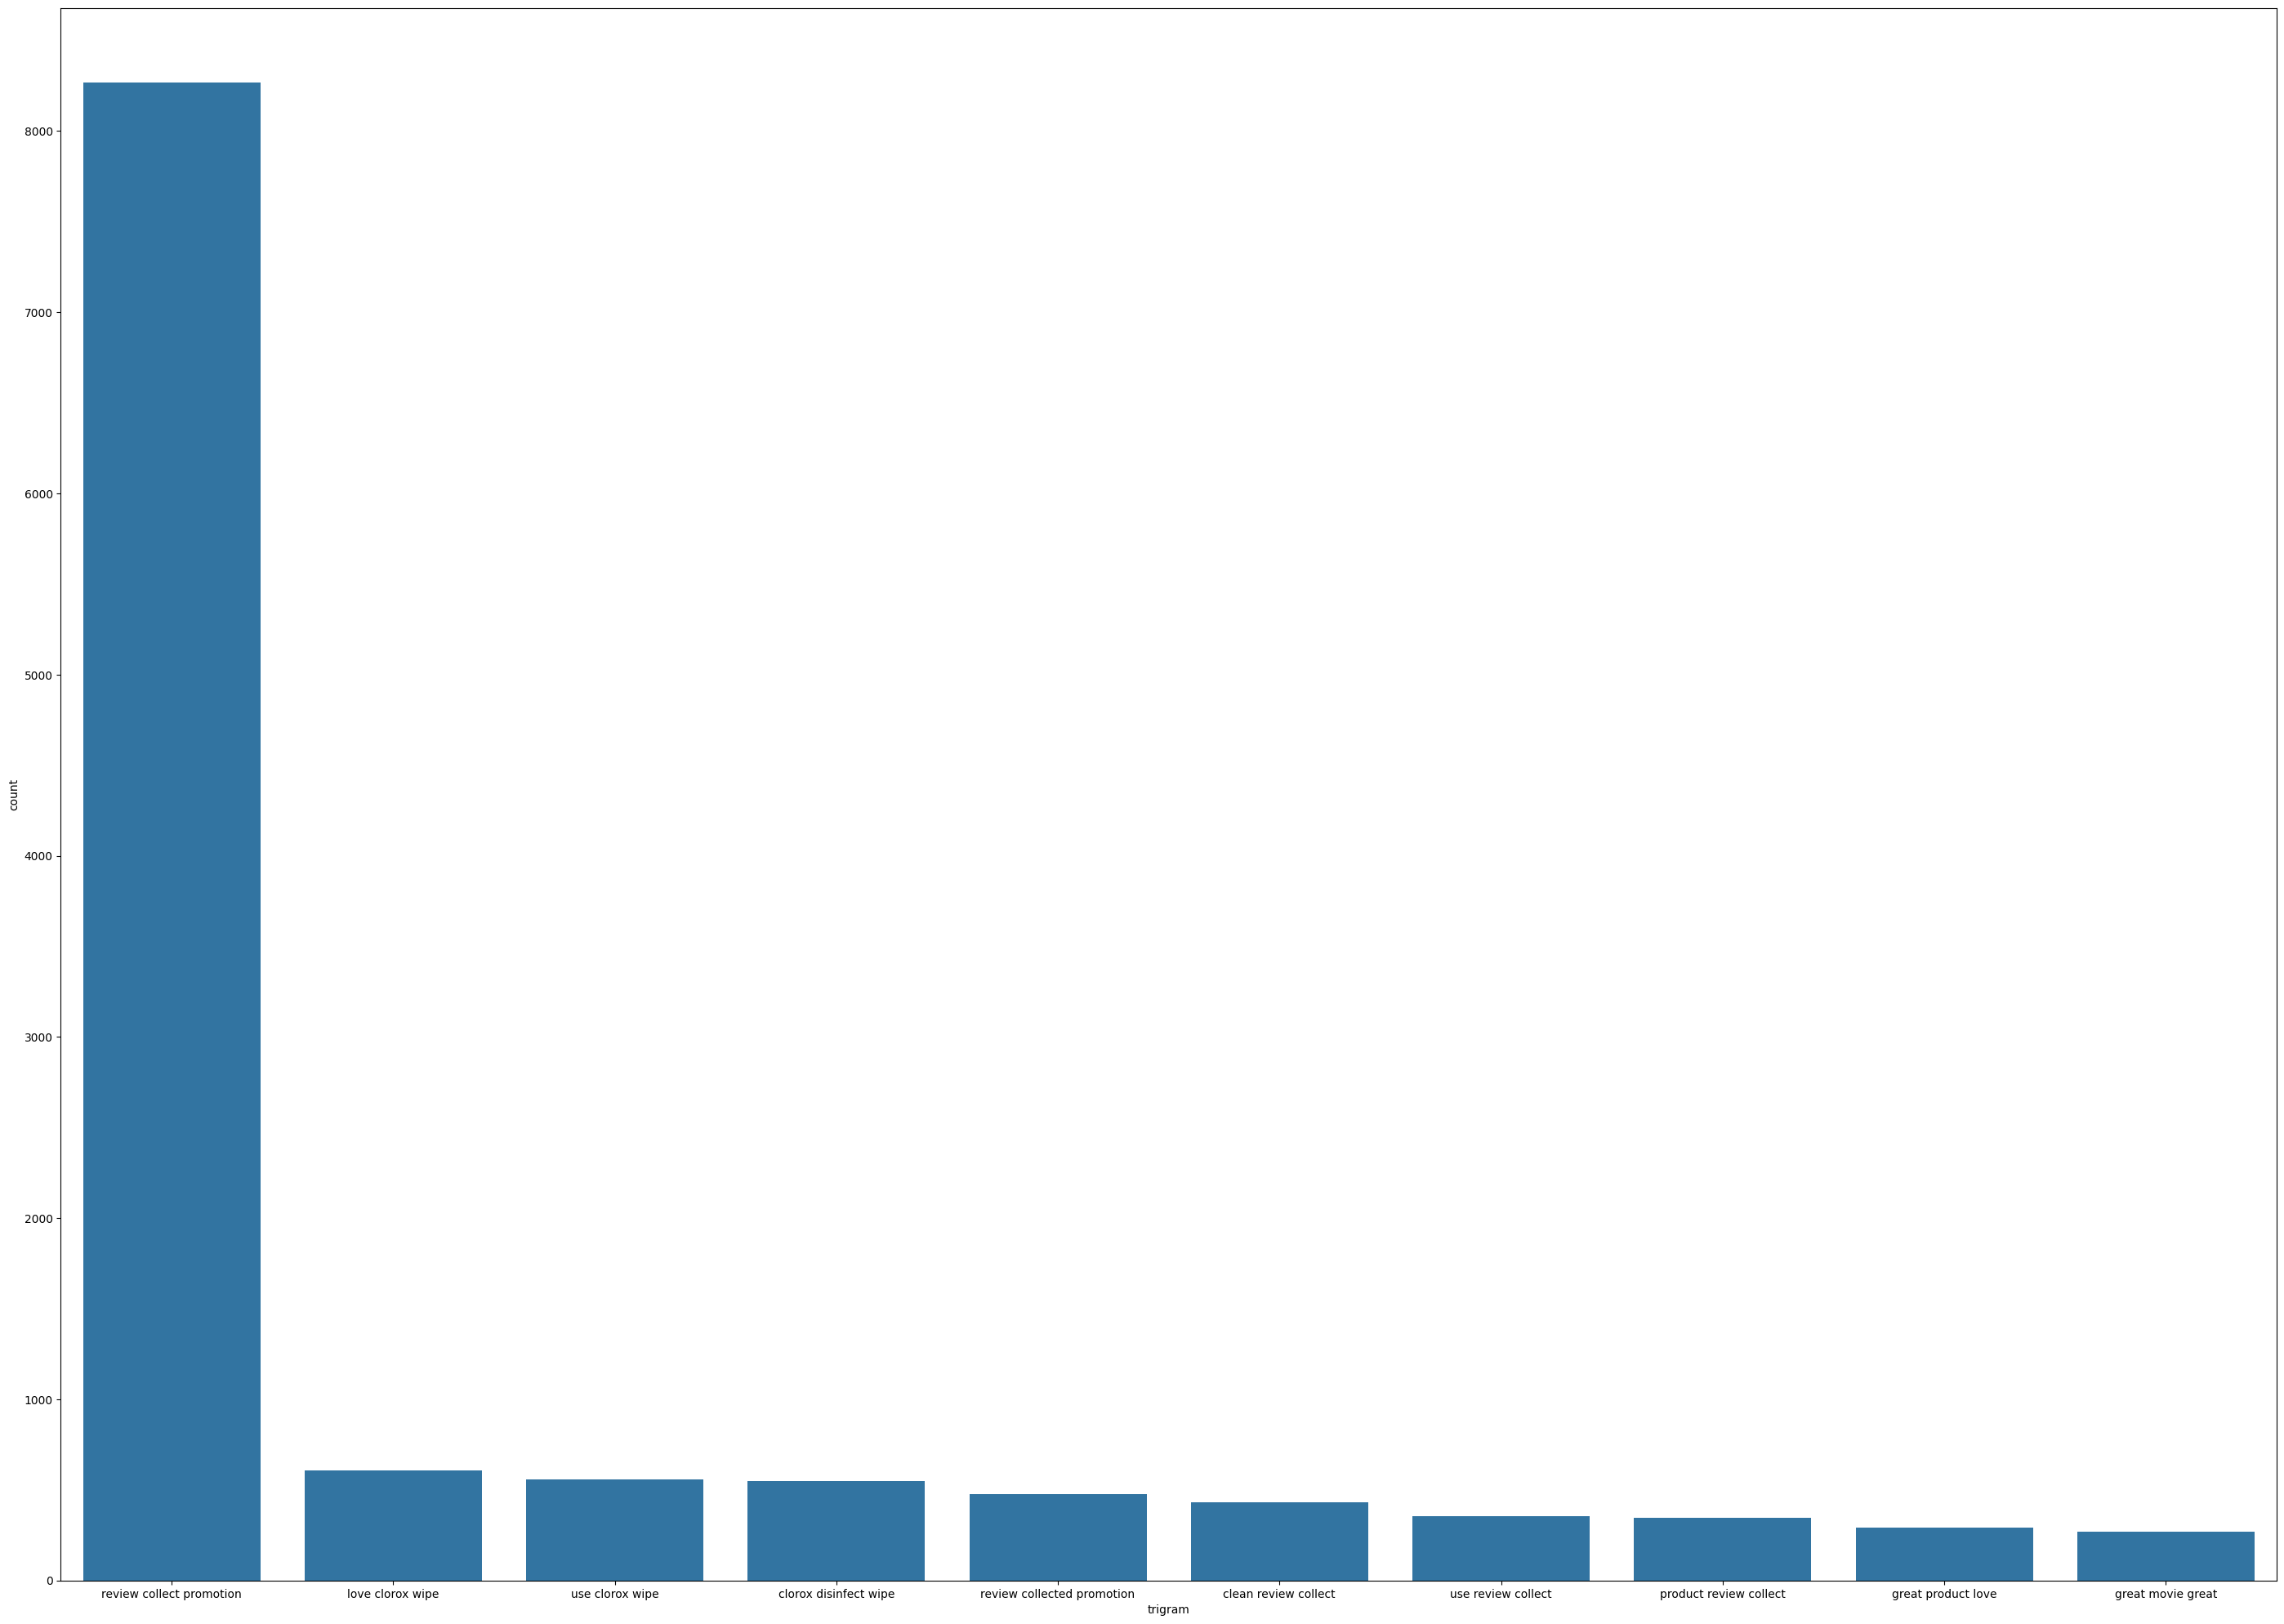

In [66]:
#finding the top 10 trigram frequency.
common_words = get_top_n_ngram(clean.reviews_cleaned_text, 3, 10)
df3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[35,25])
fig = sns.barplot(x=df3['trigram'], y=df3['count'])

### Feature Extraction

In [67]:
X = clean['reviews_cleaned_text']
y = clean['user_sentiment']

In [68]:
#using TF-IDF vectorizer using the parameters to get 650 features.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True,
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(clean['reviews_cleaned_text'])

y= clean['user_sentiment']

In [69]:
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'act' 'action' 'action movie'
 'actor' 'actually' 'add' 'age' 'ago' 'amaze' 'amazing' 'apply' 'area'
 'ask' 'available' 'away' 'awesome' 'awesome movie' 'awesome product'
 'awful' 'baby' 'bad' 'bag' 'bathroom' 'bathroom kitchen' 'beautiful'
 'bee' 'begin' 'believe' 'best' 'best buy' 'best product' 'big' 'bit'
 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle' 'box' 'boy'
 'brand' 'break' 'bring' 'bring cocoa' 'bring old' 'brown' 'burt'
 'burt bee' 'buy' 'canister' 'car' 'care' 'carpet' 'carry' 'cast' 'cd'
 'chair' 'change' 'character' 'cheap' 'child' 'chip' 'classic' 'classroom'
 'clay' 'clean' 'clean bathroom' 'clean disinfect' 'clean easy'
 'clean fresh' 'clean great' 'clean kitchen' 'clean love' 'clean mess'
 'clean product' 'clean review' 'clean smell' 'clean ups' 'clean use'
 'clean wipe' 'cleaner' 'cleaning' 'cleanup' 'clear' 'clorox'
 'clorox disinfect' 'clorox love' 'clorox product' 'clorox wipe' 'close'
 'cocoa' 'cold' 'collect' '

In [70]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22452, 650), (7484, 650), (22452,), (7484,))

### **Class Imbalance**

In [72]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 20087, 0: 2365})
After Counter({1: 20087, 0: 20087})


## **Model Building**

In [73]:
class ModelBuilding:
    def __init__(s,model_type,x_train,x_test,y_train,y_test):
        s.model = model_type
        s.x_train = x_train
        s.x_test = x_test
        s.y_train = y_train
        s.y_test = y_test

    def training_model(s):
        s.model.fit(s.x_train,s.y_train)
        return s.model.predict(s.x_test)

    def evaluating_model(s, y_pred_class):
        print("\n")
        print("*"*50)
        s.result_metrics = s.evaluation_metrics(y_pred_class)
        print("*"*50)
        print("\n")

        s.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        s.confusion_matrix(y_pred_class)

        print("*"*30)
        print("\n")

        metrics.RocCurveDisplay.from_estimator(s.model, s.x_test, s.y_test)

        return s.result_metrics

    def evaluation_metrics(s, y_pred_class):
        result_metrics = []
        accuracy = metrics.accuracy_score(s.y_test, y_pred_class)
        precision = metrics.precision_score(s.y_test, y_pred_class)
        recall = metrics.recall_score(s.y_test, y_pred_class)
        f1score = metrics.f1_score(s.y_test, y_pred_class)
        y_pred_prob = s.model.predict_proba(s.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(s.y_test, y_pred_prob)

        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")

        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics

    def confusion_matrix(s, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(s.y_test, y_pred_class)
        s.plot_confusion_matrix(confusion_matrix,[0,1])


    def plot_confusion_matrix(s, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)

        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()

    def classification_report(s, y_pred_class):
        print(metrics.classification_report(s.y_test, y_pred_class))


Logistic Regression

In [74]:
# Building the Logistic Regression model.

logreg = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_model_build = ModelBuilding(logreg, X_train, X_test, y_train, y_test)

In [75]:
# Train and Predict the Test Labels

y_pred_class = lr_model_build.training_model()



**************************************************
Accuracy is : 88.3%
Precision is : 96.7%
Recall is : 90.1%
F1 Score is : 93.3%
Roc-Auc Score is:90.0%
**************************************************


              precision    recall  f1-score   support

           0       0.46      0.73      0.56       770
           1       0.97      0.90      0.93      6714

    accuracy                           0.88      7484
   macro avg       0.71      0.81      0.75      7484
weighted avg       0.91      0.88      0.89      7484

******************************




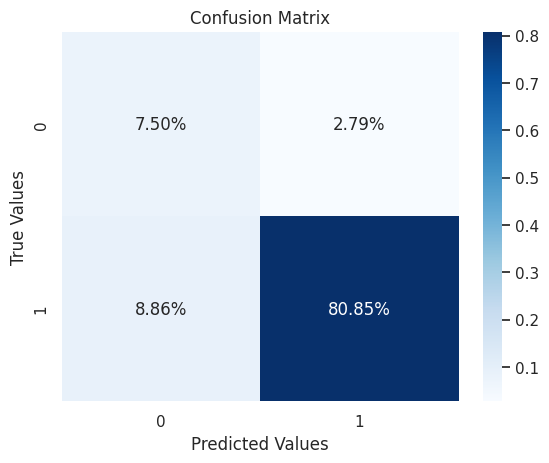

******************************




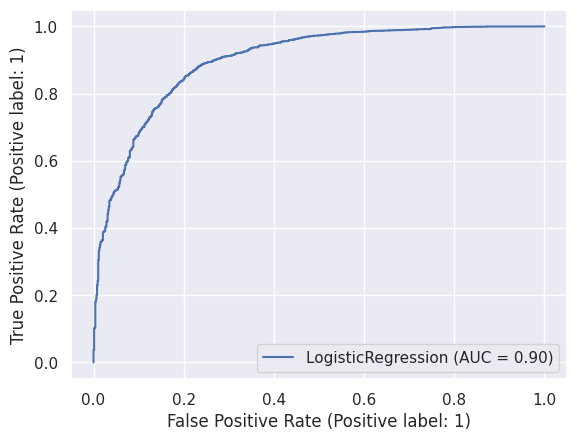

In [76]:
lr_metrics = lr_model_build.evaluating_model(y_pred_class)

**Random Forest**

In [77]:
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")

In [78]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [79]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [80]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [81]:
rf_best = grid_search.best_estimator_
rf_model_build= ModelBuilding(rf_best, X_train, X_test, y_train, y_test)



**************************************************
Accuracy is : 79.6%
Precision is : 96.4%
Recall is : 80.3%
F1 Score is : 87.6%
Roc-Auc Score is:86.2%
**************************************************


              precision    recall  f1-score   support

           0       0.30      0.74      0.43       770
           1       0.96      0.80      0.88      6714

    accuracy                           0.80      7484
   macro avg       0.63      0.77      0.65      7484
weighted avg       0.90      0.80      0.83      7484

******************************




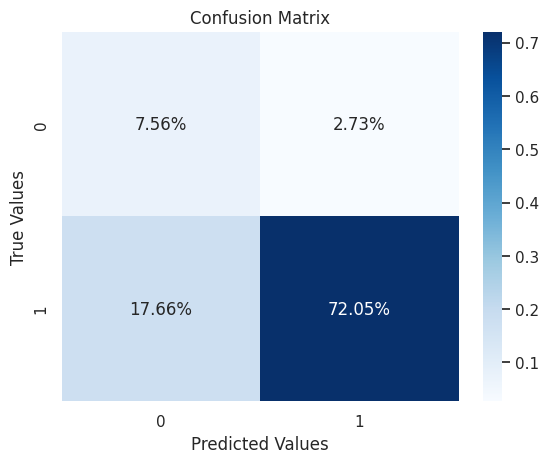

******************************




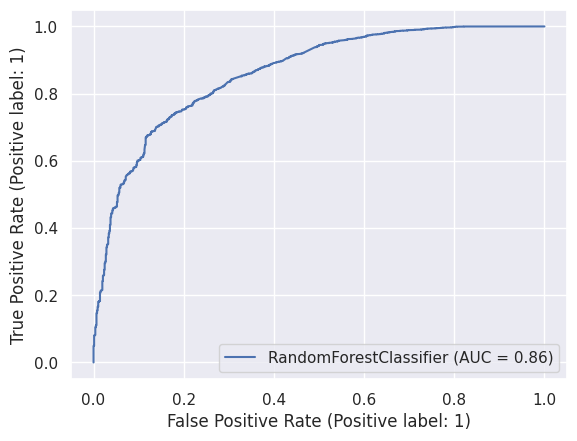

In [82]:
# Train and Predict the Test Labels
y_pred_class  = rf_model_build.training_model()
rf_metrics = rf_model_build.evaluating_model(y_pred_class)

**XGBoost Classifier**

In [83]:
xg = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) #based on the tuned parameters
xg_model_build = ModelBuilding(xg, X_train, X_test, y_train, y_test)



**************************************************
Accuracy is : 90.6%
Precision is : 95.8%
Recall is : 93.6%
F1 Score is : 94.7%
Roc-Auc Score is:90.7%
**************************************************


              precision    recall  f1-score   support

           0       0.53      0.64      0.58       770
           1       0.96      0.94      0.95      6714

    accuracy                           0.91      7484
   macro avg       0.75      0.79      0.76      7484
weighted avg       0.91      0.91      0.91      7484

******************************




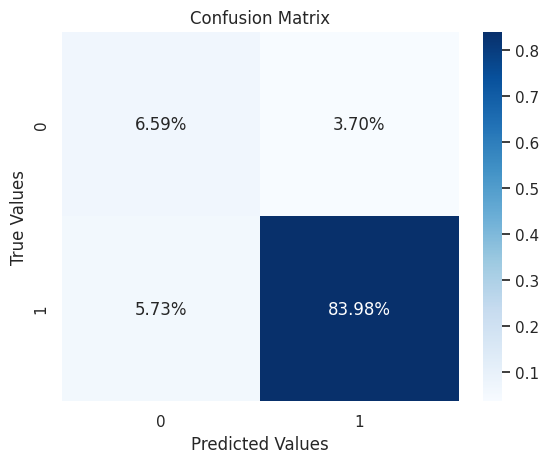

******************************




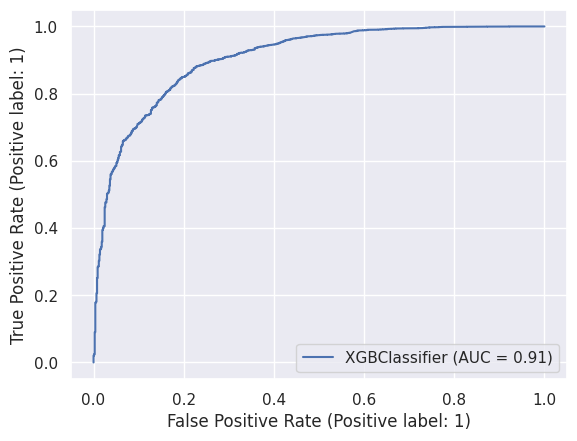

In [84]:
# Train and Predict the Test Labels

y_pred_class  = xg_model_build.training_model()
xg_metrics = xg_model_build.evaluating_model(y_pred_class)

**Naive Bayes**

In [85]:
mnb = MultinomialNB(alpha=1.0)
mnb_model_build = ModelBuilding(mnb, X_train, X_test, y_train, y_test)



**************************************************
Accuracy is : 81.2%
Precision is : 97.5%
Recall is : 81.1%
F1 Score is : 88.6%
Roc-Auc Score is:89.5%
**************************************************


              precision    recall  f1-score   support

           0       0.33      0.82      0.47       770
           1       0.98      0.81      0.89      6714

    accuracy                           0.81      7484
   macro avg       0.65      0.82      0.68      7484
weighted avg       0.91      0.81      0.84      7484

******************************




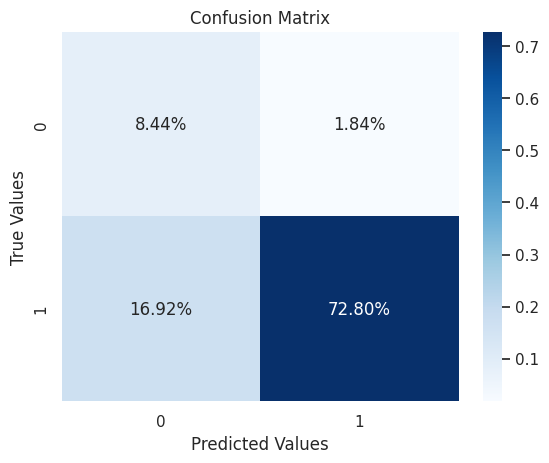

******************************




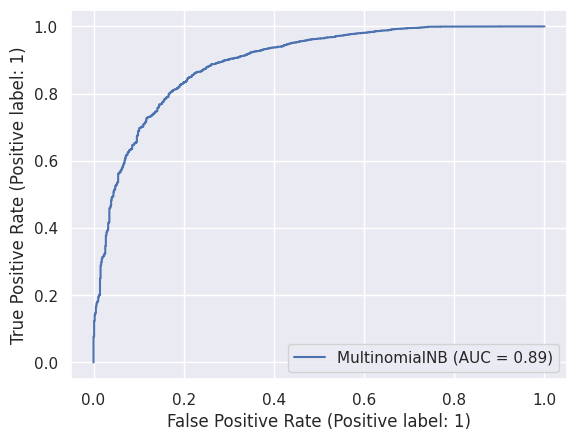

In [86]:
# Train and Predict the Test Labels

y_pred_class  = mnb_model_build.training_model()
nb_metrics = mnb_model_build.evaluating_model(y_pred_class)

## **Model Inference**

In [87]:
xg_metrics

[0.9056654195617317,
 0.9577872599817129,
 0.9361036639857016,
 0.9468213317264236,
 0.9065010503348304]

In [88]:
# Creating a table with all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'],
        'Logistic Regression': lr_metrics,
        'Random Forrest': rf_metrics,
        'XG Boost': xg_metrics,
        'Naive Bayes': nb_metrics,
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression','Random Forrest','XG Boost','Naive Bayes'] )

df_metrics

Metric  Logistic Regression  Random Forrest  XG Boost  Naive Bayes
0   Accuracy                 0.88            0.80      0.91         0.81
1  Precision                 0.97            0.96      0.96         0.98
2     Recall                 0.90            0.80      0.94         0.81
3    F1Score                 0.93            0.88      0.95         0.89
4  Auc Score                 0.90            0.86      0.91         0.89

# **Recommendation System**

In [89]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29936 non-null  object
 1   brand                29936 non-null  object
 2   categories           29936 non-null  object
 3   manufacturer         29795 non-null  object
 4   name                 29936 non-null  object
 5   reviews_date         29896 non-null  object
 6   reviews_didPurchase  15931 non-null  object
 7   reviews_doRecommend  27395 non-null  object
 8   reviews_rating       29936 non-null  int64 
 9   reviews_text         29936 non-null  object
 10  reviews_title        29936 non-null  object
 11  reviews_username     29936 non-null  object
 12  user_sentiment       29936 non-null  int64 
 13  reviews_full_text    29936 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.4+ MB


In [90]:
recommendation = reviews[["id", "name", "reviews_rating", "reviews_username"]]
calc_Missing_Count(recommendation)

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [91]:
#splitting the train and test

train, test = train_test_split(recommendation, test_size=0.25, random_state=42)

In [92]:
train.shape, test.shape

((22452, 4), (7484, 4))

In [93]:
prod_col = "id"
usr_col = "reviews_username"
value_col = "reviews_rating"

In [94]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
pivot = pd.pivot_table(train,index=usr_col, columns = prod_col, values = value_col).fillna(0)
pivot.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00                    

### **Creating Dummy Train and Test set**

In [95]:
dummy_train = train.copy()

In [96]:
dummy_train.head()

id  \
27954  AVpfRTh1ilAPnD_xYic2   
3375   AVpe5s3RLJeJML43x4eA   
20192  AVpfJP1C1cnluZ0-e3Xy   
457    AV1l8zRZvKc47QAVhnAv   
19060  AVpfJP1C1cnluZ0-e3Xy   

                                                                      name  \
27954  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
3375                  Pantene Pro-V Expert Collection Age Defy Conditioner   
20192                                 Clorox Disinfecting Bathroom Cleaner   
457                      Olay Regenerist Deep Hydration Regenerating Cream   
19060                                 Clorox Disinfecting Bathroom Cleaner   

       reviews_rating reviews_username  
27954               5        silvahalo  
3375                4         stacberg  
20192               5           erwerw  
457                 5           olay53  
19060               5         nicelady

In [97]:
# The products not rated by user is marked as 1 for prediction.

dummy_train[value_col] = dummy_train[value_col].apply(lambda x: 0 if x>=1 else 1)

In [98]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index=usr_col, columns = prod_col, values = value_col).fillna(1)
dummy_train.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00                    

### **User similarity matrix**

In [99]:
pivot.index.nunique()

19427

In [100]:
#using cosine_similarity function to compute the distance.

user_correlation = cosine_similarity(pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
(19427, 19427)


In [101]:
#filtering out the user_correlation that are negatively correlated

user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [102]:
user_predicted_ratings = np.dot(user_correlation, pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 1.20913332, ..., 2.9103958 , 0.        ,
        0.54410719],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 1.64034869, 0.        ,
        0.57353933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [103]:
user_predicted_ratings.shape

(19427, 260)

In [104]:
#since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero

user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                           1.21                 13.58   
01impala                          3.12                 15.58   
02dakota                          3.12                 15.58   
02deuce                           3.12                 15.58   
0325home                          0.00                 11.34   
06stidriver                       0.00                 11.34   
08dallas                          0.00                  0.66   
09mommy11                         0.00                  7.34   
1.11E+24                          0.00                 11.34   
1085                              0.00                 11.70   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0                  2.26   
01impala                           0.0                  0.00   
02dakota                           0.0                  0.00   
02deuce                            0.0                  0.00   
0325home                           0.0                  6.01   
06stidriver                        0.0                  6.01   
08dallas                           0.0                  0.00   
09mommy11                          0.0                  2.89   
1.11E+24                           0.0                  6.01   
1085                               0.0                  2.38   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                           0.44                  3.14   
01impala                          2.34                  2.12   
02dakota                          2.34                  2.12   
02deuce                           2.34                  2.12   
0325home                          6.94                  2.10   
06stidriver                       6.94                  2.10   
08dallas                          0.00                  1.68   
09mommy11                         0.62                  6.01   
1.11E+24                          6.94                  2.10   
1085                              0.00                  2.89   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00                    

### **Find 20 recommendation for the user**

In [105]:
user_input = "01impala"
print(user_input)

01impala


In [106]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpfRTh1ilAPnD_xYic2    141.06
AVpf0eb2LJeJML43EVSt    110.42
AVpe41TqilAPnD_xQH3d     90.15
AVpf2tw1ilAPnD_xjflC     73.27
AVpe59io1cnluZ0-ZgDU     58.95
AVpf3VOfilAPnD_xjpun     44.76
AVpfPnrU1cnluZ0-g9rL     29.27
AVpf0thK1cnluZ0-r8vR     24.41
AVpfM_ytilAPnD_xXIJb     23.70
AVpfJP1C1cnluZ0-e3Xy     23.22
AVpe31o71cnluZ0-YrSD     20.75
AVpfR5m0LJeJML436K3W     20.13
AVpf5olc1cnluZ0-tPrO     19.63
AV1YGDqsGV-KLJ3adc-O     15.58
AVpfOIrkilAPnD_xXgDG     15.57
AVpe9W4D1cnluZ0-avf0     15.27
AVpfBrUZilAPnD_xTUly     13.17
AVpf--o9LJeJML43G_Fq     12.84
AVpf385g1cnluZ0-s0_t     12.78
AVpfazX31cnluZ0-kbdl     11.78
Name: 01impala, dtype: float64

In [107]:
# display the top 20 product id, name and their similarity_score

final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id  \
0      AVpfRTh1ilAPnD_xYic2   
851    AVpf0eb2LJeJML43EVSt   
1488   AVpe41TqilAPnD_xQH3d   
2061   AVpf2tw1ilAPnD_xjflC   
2580   AVpe59io1cnluZ0-ZgDU   
3074   AVpf3VOfilAPnD_xjpun   
9448   AVpfPnrU1cnluZ0-g9rL   
9586   AVpf0thK1cnluZ0-r8vR   
9684   AVpfM_ytilAPnD_xXIJb   
9880   AVpfJP1C1cnluZ0-e3Xy   
11443  AVpe31o71cnluZ0-YrSD   
11630  AVpfR5m0LJeJML436K3W   
11772  AVpf5olc1cnluZ0-tPrO   
11901  AV1YGDqsGV-KLJ3adc-O   
12167  AVpfOIrkilAPnD_xXgDG   
12272  AVpe9W4D1cnluZ0-avf0   
12528  AVpfBrUZilAPnD_xTUly   
12651  AVpf--o9LJeJML43G_Fq   
12719  AVpf385g1cnluZ0-s0_t   
12863  AVpfazX31cnluZ0-kbdl   

                                                                                                name  \
0                                Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
851                                                   The Resident Evil Collection 5 Discs (blu-Ray)   
1488                                                    Mike Dave Need Wedding Dates (dvd + Digital)   
2061                                                                Red (special Edition) (dvdvideo)   
2580                                            My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)   
3074                                       Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
9448                                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
9586                                                             100:Complete First Season (blu-Ray)   
9684                                                               Tostitos Bite Size Tortilla Chips   
9880                                                            Clorox Disinfecting Bathroom Cleaner   
11443                                  Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)   
11630                                                                 Jason Aldean - They Don't Know   
11772                                                      Chester's Cheese Flavored Puffcorn Snacks   
11901                                          Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   
12167                                                                          Alex Cross (dvdvideo)   
12272  Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com   
12528                                           Coty Airspun Face Powder, Translucent Extra Coverage   
12651                                           Vaseline Intensive Care Healthy Hands Stronger Nails   
12719                                                                         Hormel Chili, No Beans   
12863                                     Just For Men Touch Of Gray Gray Hair Treatment, Black T-55   

       similarity_score  
0                141.06  
851              110.42  
1488              90.15  
2061              73.27  
2580              58.95  
3074              44.76  
9448              29.27  
9586              24.41  
9684              23.70  
9880              23.22  
11443             20.75  
11630             20.13  
11772             19.63  
11901             15.58  
12167             15.57  
12272             15.27  
12528             13.17  
12651             12.84  
12719             12.78  
12863             11.78

### **Evaluation -User User**

In [108]:
# Find out the common users of test and train dataset.

common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1795, 4)

In [109]:
common.head()

id  \
12875  AVpf3VOfilAPnD_xjpun   
22577  AVpfOmKwLJeJML435GM7   
21657  AVpfm8yiLJeJML43AYyu   
23320  AVpfPaoqLJeJML435Xk9   
21505  AVpfm8yiLJeJML43AYyu   

                                                                  name  \
12875        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
22577         Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
21657                        Nexxus Exxtra Gel Style Creation Sculptor   
23320  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
21505                        Nexxus Exxtra Gel Style Creation Sculptor   

       reviews_rating reviews_username  
12875               5          jessica  
22577               4            at527  
21657               1       romance318  
23320               3       countprice  
21505               1           farbar

In [110]:
common_user_based_matrix = pd.pivot_table(common,index=usr_col, columns = prod_col, values = value_col)
common_user_based_matrix.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe41TqilAPnD_xQH3d  AVpe4hlXLJeJML43xbrB  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             5.0                   NaN   
85lisa                  

In [111]:
# Convert the user_correlation matrix into dataframe.

user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

0      1      2      3      4      5      6      7      8      9      \
0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.95   
1    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   0.00   
2    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   0.00   
3    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   0.00   
4    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0   0.00   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0   0.21    0.0    0.0    0.0   0.95   0.32    0.0   
1    0.0    0.0    0.0   0.53    0.0    0.0    0.0   0.00   0.00    1.0   
2    0.0    0.0    0.0   0.53    0.0    0.0    0.0   0.00   0.00    1.0   
3    0.0    0.0    0.0   0.53    0.0    0.0    0.0   0.00   0.00    1.0   
4    0.0    0.0    0.0   0.00    1.0    1.0    0.0   0.00   0.00    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0   0.32    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0   0.00    0.0    1.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0   0.00    0.0    1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0   0.00    0.0    1.0    0.0    0.0    0.0    0.0   
4    1.0    1.0    0.0   0.00    1.0    0.0    0.0    1.0    0.0    1.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   
1    0.0    0.0    0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
2    0.0    0.0    0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
3    0.0    0.0    0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
4    1.0    0.0    0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2    1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3    1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    1.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.32   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.00   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.00   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.00   
4    1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   0.00   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    1.0    1.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    1

In [112]:
user_correlation_df[usr_col] = pivot.index
user_correlation_df.set_index(usr_col,inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00sab00             1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
02dakota            0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
02deuce             0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

                  8      9      10     11     12     13     14     15     \
reviews_username                                                           
00sab00             0.0   0.95    0.0    0.0    0.0   0.21    0.0    0.0   
01impala            0.0   0.00    0.0    0.0    0.0   0.53    0.0    0.0   
02dakota            0.0   0.00    0.0    0.0    0.0   0.53    0.0    0.0   
02deuce             0.0   0.00    0.0    0.0    0.0   0.53    0.0    0.0   
0325home            1.0   0.00    0.0    0.0    0.0   0.00    1.0    1.0   

                  16     17     18     19     20     21     22     23     \
reviews_username                                                           
00sab00             0.0   0.95   0.32    0.0    0.0    0.0    0.0   0.32   
01impala            0.0   0.00   0.00    1.0    0.0    0.0    0.0   0.00   
02dakota            0.0   0.00   0.00    1.0    0.0    0.0    0.0   0.00   
02deuce             0.0   0.00   0.00    1.0    0.0    0.0    0.0   0.00   
0325home            0.0   0.00   0.00    0.0    1.0    1.0    0.0   0.00   

                  24     25     26     27     28     29     30     31     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            1.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0   

                  32     33     34     35     36     37     38     39     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   
01impala            0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
02dakota            0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
02deuce             0.0    0.0    1.0    0.0    0.0   0.51    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   

                  40     41     42     43     44     45     46     47     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0   
02dakota            1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0   
02deuce             1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   

                  48     49     50     51     52     53     54     55     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
0325home            1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  56     57     58     59     60     61     62     63     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0 

In [113]:
common.head()

id  \
12875  AVpf3VOfilAPnD_xjpun   
22577  AVpfOmKwLJeJML435GM7   
21657  AVpfm8yiLJeJML43AYyu   
23320  AVpfPaoqLJeJML435Xk9   
21505  AVpfm8yiLJeJML43AYyu   

                                                                  name  \
12875        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
22577         Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
21657                        Nexxus Exxtra Gel Style Creation Sculptor   
23320  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
21505                        Nexxus Exxtra Gel Style Creation Sculptor   

       reviews_rating reviews_username  
12875               5          jessica  
22577               4            at527  
21657               1       romance318  
23320               3       countprice  
21505               1           farbar

In [114]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [115]:
user_correlation_df_1.shape

(1530, 19427)

In [116]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [117]:
user_correlation_df_3 = user_correlation_df_2.T

In [118]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        2.29277852],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        1.49255579],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [119]:
dummy_test = common.copy()

dummy_test[value_col] = dummy_test[value_col].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=usr_col, columns = prod_col, values = value_col).fillna(0)

In [120]:
dummy_test.shape

(1530, 129)

In [121]:
common_user_based_matrix.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe41TqilAPnD_xQH3d  AVpe4hlXLJeJML43xbrB  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             NaN                   NaN   
85lisa                             NaN                   NaN   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
1234                               NaN                   NaN   
1234567                            NaN                   NaN   
123charlie                         NaN                   NaN   
1witch                             5.0                   NaN   
85lisa                  

In [122]:
dummy_test.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe41TqilAPnD_xQH3d  AVpe4hlXLJeJML43xbrB  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             1.0                   0.0   
85lisa                  

In [123]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [124]:
common_user_predicted_ratings.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe41TqilAPnD_xQH3d  AVpe4hlXLJeJML43xbrB  \
reviews_username                                               
1234                               0.0                   0.0   
1234567                            0.0                   0.0   
123charlie                         0.0                   0.0   
1witch                             0.0                   0.0   
85lisa                             0.0                   0.0   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
1234                              0.00                   0.0   
1234567                           0.00                   0.0   
123charlie                        0.00                   0.0   
1witch                           17.38                   0.0   
85lisa                  

In [125]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [126]:
common_ = pd.pivot_table(common,index=usr_col, columns = prod_col, values = value_col)

In [127]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [128]:
rmse_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_user)

2.09137486961924


## **Item Based Recommendation**

In [129]:
df_pivot = pd.pivot_table(train,
    index=prod_col,
    columns=usr_col,
    values=value_col
)

df_pivot.head()

reviews_username      00sab00  01impala  02dakota  02deuce  0325home  \
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  11677j  1234  1234561  \
id                                                                       
AV13O1A8GV-KLJ3akUyj                        NaN     NaN   NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN     NaN   NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN     NaN   NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN     NaN   NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN     NaN   NaN      NaN   

reviews_username      1234567  1234asdf  123cat123  123charlie  123numbers  \
id                                                                           
AV13O1A8GV-KLJ3akUyj      NaN       NaN        NaN         NaN         NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN        NaN         NaN         NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN        NaN         NaN         NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN        NaN         NaN         NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN        NaN         NaN         NaN   

reviews_username      123rs  123soccermom  123too  127726  12cass12  12gage  \
id                                                                            
AV13O1A8GV-KLJ3akUyj    NaN           NaN     NaN     NaN       NaN     NaN   
AV14LG0R-jtxr-f38QfS    NaN           NaN     NaN     NaN       NaN     NaN   
AV16khLE-jtxr-f38VFn    NaN           NaN     NaN     NaN       NaN     NaN   
AV1YGDqsGV-KLJ3adc-O    NaN           NaN     NaN     NaN       NaN     NaN   
AV1YIch7GV-KLJ3addeG    NaN           NaN     NaN     NaN       NaN     NaN   

reviews_username      132457  13dani  13ram  13thfaerie  1421nikki  143st  \
id                                                                          
AV13O1A8GV-KLJ3akUyj     NaN     NaN    NaN         NaN        NaN    NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN    NaN         NaN        NaN    NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN    NaN         NaN        NaN    NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN    NaN         NaN        NaN    NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN    NaN         NaN        NaN    NaN   

reviews_username      148maine  15425shopper  170361eggs  17roses  1863philly  \
id                                                                              
AV13O1A8GV-KLJ3akUyj       NaN           NaN         NaN      NaN         NaN   
AV14LG0R-jtxr-f38QfS       NaN           NaN         NaN      NaN         NaN   
AV16khLE-jtxr-f38VFn       NaN           NaN         NaN      NaN         NaN   
AV1YGDqsGV-KLJ3adc-O       NaN           NaN         NaN      NaN         NaN   
AV1YIch7GV-KLJ3addeG       NaN           NaN         NaN      NaN         NaN   

reviews_username      1943  1950rmm  1968bear  1970  1992firebirdgirl  \
id                                                                      
AV13O1A8GV-KLJ3akUyj   NaN      NaN       NaN   NaN  

In [130]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [131]:
df_subtracted.head()

reviews_username      00sab00  01impala  02dakota  02deuce  0325home  \
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  11677j  1234  1234561  \
id                                                                       
AV13O1A8GV-KLJ3akUyj                        NaN     NaN   NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN     NaN   NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN     NaN   NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN     NaN   NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN     NaN   NaN      NaN   

reviews_username      1234567  1234asdf  123cat123  123charlie  123numbers  \
id                                                                           
AV13O1A8GV-KLJ3akUyj      NaN       NaN        NaN         NaN         NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN        NaN         NaN         NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN        NaN         NaN         NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN        NaN         NaN         NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN        NaN         NaN         NaN   

reviews_username      123rs  123soccermom  123too  127726  12cass12  12gage  \
id                                                                            
AV13O1A8GV-KLJ3akUyj    NaN           NaN     NaN     NaN       NaN     NaN   
AV14LG0R-jtxr-f38QfS    NaN           NaN     NaN     NaN       NaN     NaN   
AV16khLE-jtxr-f38VFn    NaN           NaN     NaN     NaN       NaN     NaN   
AV1YGDqsGV-KLJ3adc-O    NaN           NaN     NaN     NaN       NaN     NaN   
AV1YIch7GV-KLJ3addeG    NaN           NaN     NaN     NaN       NaN     NaN   

reviews_username      132457  13dani  13ram  13thfaerie  1421nikki  143st  \
id                                                                          
AV13O1A8GV-KLJ3akUyj     NaN     NaN    NaN         NaN        NaN    NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN    NaN         NaN        NaN    NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN    NaN         NaN        NaN    NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN    NaN         NaN        NaN    NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN    NaN         NaN        NaN    NaN   

reviews_username      148maine  15425shopper  170361eggs  17roses  1863philly  \
id                                                                              
AV13O1A8GV-KLJ3akUyj       NaN           NaN         NaN      NaN         NaN   
AV14LG0R-jtxr-f38QfS       NaN           NaN         NaN      NaN         NaN   
AV16khLE-jtxr-f38VFn       NaN           NaN         NaN      NaN         NaN   
AV1YGDqsGV-KLJ3adc-O       NaN           NaN         NaN      NaN         NaN   
AV1YIch7GV-KLJ3addeG       NaN           NaN         NaN      NaN         NaN   

reviews_username      1943  1950rmm  1968bear  1970  1992firebirdgirl  \
id                                                                      
AV13O1A8GV-KLJ3akUyj   NaN      NaN       NaN   NaN  

In [132]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [133]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - item-item

In [134]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

In [135]:
item_predicted_ratings.shape

(19427, 260)

### Filtering the rating only for the products not rated by the user for recommendation

In [136]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            0.0              9.14e-03   
01impala                           0.0              0.00e+00   
02dakota                           0.0              0.00e+00   
02deuce                            0.0              0.00e+00   
0325home                           0.0              0.00e+00   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0              0.00e+00   
01impala                           0.0              0.00e+00   
02dakota                           0.0              0.00e+00   
02deuce                            0.0              0.00e+00   
0325home                           0.0              1.32e-03   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                       0.00e+00              5.83e-03   
01impala                      0.00e+00              4.56e-03   
02dakota                      0.00e+00              7.59e-03   
02deuce                       0.00e+00              6.07e-03   
0325home                      3.77e-03              1.80e-03   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00sab00                       0.00e+00              0.00e+00   
01impala                      0.00e+00              6.21e-04   
02dakota                      0.00e+00              1.03e-03   
02deuce                       0.00e+00              8.28e-04   
0325home                      6.37e-03              2.73e-03   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00sab00                       7.11e-03                   0.0   
01impala                      0.00e+00                   0.0   
02dakota                      0.00e+00                   0.0   
02deuce                       0.00e+00                   0.0   
0325home                

### **Finding the top 20 recommendation for the user**

In [137]:
# Take the user ID as input

user_input = '06stidriver'
print(user_input)

06stidriver


In [138]:
# Recommending the Top 5 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpfJP1C1cnluZ0-e3Xy    8.84e-01
AVpf-bS61cnluZ0-uZcq    1.88e-02
AVpfkQkcLJeJML43_kEC    1.88e-02
AVpf7I3i1cnluZ0-tnL6    1.59e-02
AVpfm8yiLJeJML43AYyu    1.21e-02
AVpfbraG1cnluZ0-kqnn    1.09e-02
AVpfvieo1cnluZ0-qdnu    9.46e-03
AVpfRTh1ilAPnD_xYic2    8.34e-03
AVpf5ujMilAPnD_xkQVi    7.69e-03
AV1YqAaMGV-KLJ3adiDj    6.37e-03
AVpfthSailAPnD_xg3ON    5.95e-03
AVpfBU2S1cnluZ0-cJsO    5.77e-03
AVpf2tw1ilAPnD_xjflC    5.56e-03
AVpfW8y_LJeJML437ySW    5.31e-03
AVpe5JOgilAPnD_xQPfE    5.16e-03
AVpfluP1ilAPnD_xejxO    4.42e-03
AVpf9_3MLJeJML43GvdB    3.91e-03
AVpfrfHF1cnluZ0-pRai    3.78e-03
AV1Ymf_rglJLPUi8II2v    3.77e-03
AVpfPnrU1cnluZ0-g9rL    3.61e-03
Name: 06stidriver, dtype: float64

In [139]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id  \
0     AVpfJP1C1cnluZ0-e3Xy   
1563  AVpf-bS61cnluZ0-uZcq   
1565  AVpfkQkcLJeJML43_kEC   
1567  AVpf7I3i1cnluZ0-tnL6   
1588  AVpfm8yiLJeJML43AYyu   
2121  AVpfbraG1cnluZ0-kqnn   
2124  AVpfvieo1cnluZ0-qdnu   
2138  AVpfRTh1ilAPnD_xYic2   
2989  AVpf5ujMilAPnD_xkQVi   
2995  AV1YqAaMGV-KLJ3adiDj   
3006  AVpfthSailAPnD_xg3ON   
3011  AVpfBU2S1cnluZ0-cJsO   
3043  AVpf2tw1ilAPnD_xjflC   
3562  AVpfW8y_LJeJML437ySW   
4444  AVpe5JOgilAPnD_xQPfE   
4473  AVpfluP1ilAPnD_xejxO   
4492  AVpf9_3MLJeJML43GvdB   
4504  AVpfrfHF1cnluZ0-pRai   
4515  AV1Ymf_rglJLPUi8II2v   
4541  AVpfPnrU1cnluZ0-g9rL   

                                                                                name  \
0                                               Clorox Disinfecting Bathroom Cleaner   
1563                        Nature's Path Chunky Chocolate Peanut Chewy Granola Bars   
1565                                                Cococare 100% Natural Castor Oil   
1567                      Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
1588                                       Nexxus Exxtra Gel Style Creation Sculptor   
2121                                                            Kind Nut Delight Bar   
2124                         L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty   
2138             Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
2989                                                   D-Con Mice Bait Station - 3ct   
2995                  Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz   
3006                                           Musselman Apple Sauce, Cinnamon, 48oz   
3011                    Power Crunch Protein Energy Bar Peanut Butter Creme Original   
3043                                                Red (special Edition) (dvdvideo)   
3562  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
4444                                      The Script - No Sound Without Silence (cd)   
4473                                                Stacy's Simply Naked Bagel Chips   
4492                                    Iman Second To None Stick Foundation, Clay 1   
4504                                           Care Free Curl Gold Instant Activator   
4515                                                   Cars Toon: Mater's Tall Tales   
4541                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   

      similarity_score  
0             8.84e-01  
1563          1.88e-02  
1565          1.88e-02  
1567          1.59e-02  
1588          1.21e-02  
2121          1.09e-02  
2124          9.46e-03  
2138          8.34e-03  
2989          7.69e-03  
2995          6.37e-03  
3006          5.95e-03  
3011          5.77e-03  
3043          5.56e-03  
3562          5.31e-03  
4444          5.16e-03  
4473          4.42e-03  
4492          3.91e-03  
4504          3.78e-03  
4515          3.77e-03  
4541          3.61e-03

### Evaluation - item-item

In [140]:
common =  test[test.id.isin(train.id)]
common.shape

(7472, 4)

In [141]:
common.head(5)

id  \
25787  AVpfPaoqLJeJML435Xk9   
12627  AVpf3VOfilAPnD_xjpun   
15778  AVpf63aJLJeJML43F__Q   
1138   AV1YmDL9vKc47QAVgr7_   
12875  AVpf3VOfilAPnD_xjpun   

                                                                  name  \
25787  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
12627        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
15778                                  Burt's Bees Lip Shimmer, Raisin   
1138                            Aussie Aussome Volume Shampoo, 13.5 Oz   
12875        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

       reviews_rating  reviews_username  
25787               5  youknowhowitgoes  
12627               5      ashleydale00  
15778               3         angie1108  
1138                5           falisha  
12875               5           jessica

In [142]:
common_item_based_matrix = common.pivot_table(index=prod_col, columns=usr_col, values=value_col)

In [143]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   90   91   92   93   94   95   96   97   98   99   ...  160  161  162  163  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   224  225  226  227  228  229  230  231  232  233  234  235  236  237  238  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   239  240  241  242  243  244  245  246  247  248  249  250  251  252  253  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   254  255  256  257  258  259  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 260 columns]

In [144]:
item_correlation_df[prod_col] = df_subtracted.index
item_correlation_df.set_index(prod_col,inplace=True)
item_correlation_df.head()

0    1    2    3    4    5    6    7    8    9    10   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      11   12   13   14   15   16   17    18   19   20   \
id                                                                        
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.04  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0   

                           21   22   23   24   25   26   27   28   29   30   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.00e+00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.00e+00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.00e+00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  8.39e-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.00e+00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       31   32   33   34   35   36   37   38   39        40   \
id                                                                             
AV13O1A8GV-KLJ3akUyj  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00e+00   
AV14LG0R-jtxr-f38QfS  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00e+00   
AV16khLE-jtxr-f38VFn  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00e+00   
AV1YGDqsGV-KLJ3adc-O  0.01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.05e-03   
AV1YIch7GV-KLJ3addeG  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00e+00   

                      41   42   43   44   45   46   47   48   49   50   \
id                                                                       
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                           51   52   53   54   55        56   57   58   59   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.00e+00  0.0  0.0  0.0  0.0  0.00e+00  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.00e+00  0.0  0.0  0.0  0.0  0.00e+00  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.00e+00  0.0  0.0  0.0  0.0  0.00e+00  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  5.41e-03  0.0  0.0  0.0  0.0  7.11e-03  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.00e+00  0.0  0.0  0.0  0.0  0.00e+00  0.0  0.0  0.0   

                      60   61   62   63   64   65   66   67   68   69   70   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      71   72        73   74   75   76   77   78   79   80   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.00e+00  

In [145]:
list_name = common.id.tolist()

In [146]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [147]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [148]:
df_subtracted

reviews_username      00sab00  01impala  02dakota  02deuce  0325home  \
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN      NaN       NaN   
...                       ...       ...       ...      ...       ...   
AVpfshNsLJeJML43CB8q      NaN       NaN       NaN      NaN       NaN   
AVpfthSailAPnD_xg3ON      NaN       NaN       NaN      NaN       NaN   
AVpftikC1cnluZ0-p31V      NaN       NaN       NaN      NaN       NaN   
AVpfv4TlilAPnD_xhjNS      NaN       NaN       NaN      NaN       NaN   
AVpfvieo1cnluZ0-qdnu      NaN       NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   
...                           ...       ...        ...       ...   ...    ...   
AVpfshNsLJeJML43CB8q          NaN       NaN        NaN       NaN   NaN    NaN   
AVpfthSailAPnD_xg3ON          NaN       NaN        NaN       NaN   NaN    NaN   
AVpftikC1cnluZ0-p31V          NaN       NaN        NaN       NaN   NaN    NaN   
AVpfv4TlilAPnD_xhjNS          NaN       NaN        NaN       NaN   NaN    NaN   
AVpfvieo1cnluZ0-qdnu          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  11677j  1234  1234561  \
id                                                                       
AV13O1A8GV-KLJ3akUyj                        NaN     NaN   NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN     NaN   NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN     NaN   NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN     NaN   NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN     NaN   NaN      NaN   
...                                         ...     ...   ...      ...   
AVpfshNsLJeJML43CB8q                        NaN     NaN   NaN      NaN   
AVpfthSailAPnD_xg3ON                        NaN     NaN   NaN      NaN   
AVpftikC1cnluZ0-p31V                        NaN     NaN   NaN      NaN   
AVpfv4TlilAPnD_xhjNS                        NaN     NaN   NaN      NaN   
AVpfvieo1cnluZ0-qdnu                        NaN     NaN   NaN      NaN   

reviews_username      1234567  1234asdf  123cat123  123charlie  123numbers  \
id                                                                           
AV13O1A8GV-KLJ3akUyj      NaN       NaN        NaN         NaN         NaN   
AV14LG0R-jtxr-f38QfS      NaN       NaN        NaN         NaN         NaN   
AV16khLE-jtxr-f38VFn      NaN       NaN        NaN         NaN         NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN        NaN         NaN         NaN   
AV1YIch7GV-KLJ3addeG      NaN       NaN        NaN         NaN         NaN   
...                       ...       ...        ...         ...         ...   
AVpfshNsLJeJML43CB8q      NaN       NaN        NaN         NaN         NaN   
AVpfthSailAPnD_xg3ON      NaN       NaN        NaN         NaN         NaN   
AVpftikC1cnluZ0-p31V      NaN       NaN        NaN         NaN         NaN   
AVpfv4TlilAPnD_xhjNS      NaN       NaN        NaN         NaN         NaN   
AVpfvieo1cnluZ0-qdnu      NaN       NaN        NaN         NaN         NaN   

reviews_username      123rs  12

In [149]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [150]:
dummy_test = common.copy()
dummy_test[value_col] = dummy_test[value_col].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=prod_col, columns=usr_col, values=value_col).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [151]:
common_ = pd.pivot_table(common,index=prod_col, columns=usr_col, values=value_col)

In [152]:
from sklearn.preprocessing import MinMaxScaler

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [153]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [154]:
rmse_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item)

3.5547511636482922


In [155]:
# The Recommended model evaluation
if rmse_user< rmse_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


# Recommendation of 20 products and filtering by sentiment model

In [156]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = clean[clean.id.isin(recommendations)]
        X =  tfidf_vectorizer.transform(temp["reviews_cleaned_text"].values.astype(str))
        temp["predicted_sentiment"]= xg.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [157]:
get_sentiment_recommendations("02deuce")

name  \
4                                       Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
3                                                            Clorox Disinfecting Bathroom Cleaner   
13                            Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
16                                                 The Resident Evil Collection 5 Discs (blu-Ray)   
15                                   Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
0                                                             100:Complete First Season (blu-Ray)   
14                                                               Red (special Edition) (dvdvideo)   
18                                           Vaseline Intensive Care Healthy Hands Stronger Nails   
9                                                                  Jason Aldean - They Don't Know   
12                                           My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)   
5                                            Coty Airspun Face Powder, Translucent Extra Coverage   
7   Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com   
6                                   Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)   
2                                                       Chester's Cheese Flavored Puffcorn Snacks   
17                                                              Tostitos Bite Size Tortilla Chips   
11                                                   Mike Dave Need Wedding Dates (dvd + Digital)   
1                                                                           Alex Cross (dvdvideo)   
8                                                                          Hormel Chili, No Beans   
19                                          Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   
10                                     Just For Men Touch Of Gray Gray Hair Treatment, Black T-55   

    predicted_sentiment  pos_review_count  total_review_count  \
4                  8525              8473                8525   
3                  2039              2003                2039   
13                 1142              1088                1142   
16                  845               796                 845   
15                  186               174                 186   
0                   139               129                 139   
14                  672               617                 672   
18                   95                86                  95   
9                   204               182                 204   
12                  668               585                 668   
5                   158               138                 158   
7                   349               296                 349   
6                   247               207                 247   
2                   177               146                 177   
17                  264               215                 264   
11                  757               610                 757   
1                   141               113                 141   
8                   196               154                 196   
19                  348               268                 348   
10                  224               156                 224   

    pos_sentiment_percent  
4                   99.39  
3                   98.23  
13                  95.27  
16                  94.20  
15                  93.55  
0                   92.81  
14                  91.82  
18                  90.53  
9                   89.22  
12                  87.57  
5                   87.34  
7                   84.81  
6                   83.81  
2                   82.49  
17                  81.44  
11                  80.58  
1                   80.14  
8                   78.57  
19                  77.01  
10                  69.64

In [158]:
# get the top 5 recommendations

get_sentiment_recommendations("02deuce")[:5]

name  \
4             Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
3                                  Clorox Disinfecting Bathroom Cleaner   
13  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
16                       The Resident Evil Collection 5 Discs (blu-Ray)   
15         Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   

    predicted_sentiment  pos_review_count  total_review_count  \
4                  8525              8473                8525   
3                  2039              2003                2039   
13                 1142              1088                1142   
16                  845               796                 845   
15                  186               174                 186   

    pos_sentiment_percent  
4                   99.39  
3                   98.23  
13                  95.27  
16                  94.20  
15                  93.55

In [159]:
# testing the above fuction on the user that doesn't exists or a new user

get_sentiment_recommendations("testing665")

User name testing665 doesn't exist
